# Concrete Compressive Strength 

By Pablo Valencia A01700912


Original Owner and Donor of the dataset:  
Prof. I-Cheng Yeh  
Department of Information Management  
Chung-Hua University,  
Hsin Chu, Taiwan 30067, R.O.C.  
e-mail:icyeh@chu.edu.tw  
TEL:886-3-5186511  

## Variables

| Name                          | Data Type   | Measurement           | Description         |
|-------------------------------|-------------|-----------------------|---------------------|
| Cement (component 1)          | quantitative | kg in a m3 mixture    | Input Variable      |
| Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture    | Input Variable      |
| Fly Ash (component 3)         | quantitative | kg in a m3 mixture    | Input Variable      |
| Water (component 4)           | quantitative | kg in a m3 mixture    | Input Variable      |
| Superplasticizer (component 5) | quantitative | kg in a m3 mixture    | Input Variable      |
| Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture    | Input Variable      |
| Fine Aggregate (component 7)   | quantitative | kg in a m3 mixture    | Input Variable      |
| Age                           | quantitative | Day (1~365)           | Input Variable      |
| Concrete compressive strength | quantitative | MPa                   | Output Variable     |


# Simple Linear Regression

Steps to follow:

1. Load the dataset.
2. Create a scatter matrix to hava an idea of how the data looks like.
3. Identify potential correlations.
4. Create a linear regression model using all of the features to predict the compressive strength of concrete.
5. Check the mean square error and the coefficient of determination to see how well the model is performing.

In [141]:
# Loading the dataset
import pandas as pd

df = pd.read_excel('dataset/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [128]:
print([len(df)])
df.columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'compressive_strength']
df.head()

[1030]


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
# Creating scatter matrix to visualize the data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
pd.plotting.scatter_matrix(df)

array([[<Axes: xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Cement (component 1)(kg in a m^3 mixture)'>,
        <Axes: xlabel='Blast Furnace Slag (component 2)(kg in a m^3 mixture)', ylabel='Cement (component 1)(kg in a m^3 mixture)'>,
        <Axes: xlabel='Fly Ash (component 3)(kg in a m^3 mixture)', ylabel='Cement (component 1)(kg in a m^3 mixture)'>,
        <Axes: xlabel='Water  (component 4)(kg in a m^3 mixture)', ylabel='Cement (component 1)(kg in a m^3 mixture)'>,
        <Axes: xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)', ylabel='Cement (component 1)(kg in a m^3 mixture)'>,
        <Axes: xlabel='Coarse Aggregate  (component 6)(kg in a m^3 mixture)', ylabel='Cement (component 1)(kg in a m^3 mixture)'>,
        <Axes: xlabel='Fine Aggregate (component 7)(kg in a m^3 mixture)', ylabel='Cement (component 1)(kg in a m^3 mixture)'>,
        <Axes: xlabel='Age (day)', ylabel='Cement (component 1)(kg in a m^3 mixture)'>,
        <Axes: xlabel='Concret

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

df_x = df[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']]
df_y = df['compressive_strength']

# Creating train and test datasets
x_train, x_test = df_x[:950], df_x[950:]
y_train, y_test = df_y[:950], df_y[950:]

# Creating a simple linear regression model using all of the features
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)
y_predictions = regression.predict(x_test)

print('Coefficients: \n', regression.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_predictions))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_predictions))

   # Improving the Previous Model
   
Steps to follow:

1. Identify the features that have a greater impact on the compressive strength of concrete.
2. Scale the data using the Min Max method.
3. Remove any features that negatively impact the performance of the model.
4. Check the mean square error and the coefficient of determination to evaluate how well the model is performing.

<Axes: xlabel='cement', ylabel='compressive_strength'>

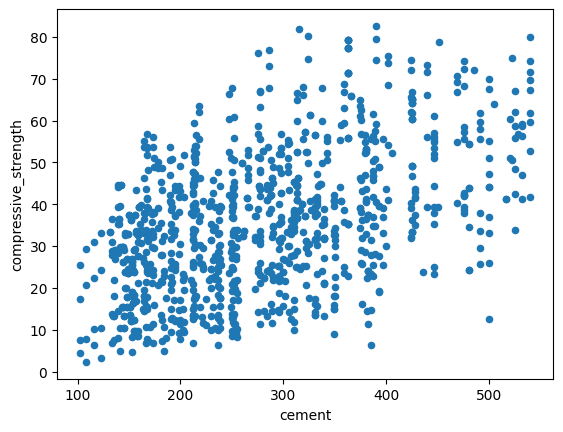

In [132]:
df.plot('cement', 'compressive_strength', kind ='scatter')

<Axes: xlabel='blast_furnace_slag', ylabel='compressive_strength'>

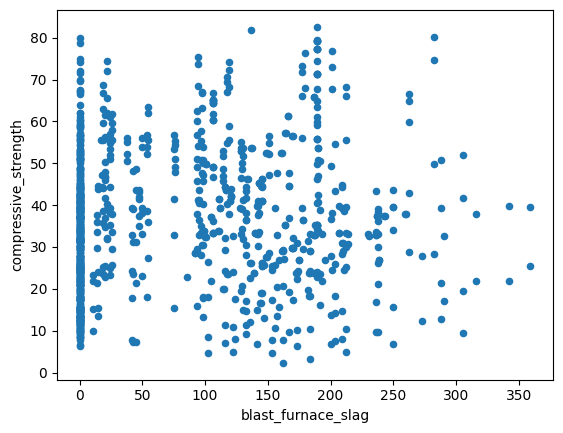

In [133]:
df.plot('blast_furnace_slag', 'compressive_strength', kind ='scatter')

<Axes: xlabel='fly_ash', ylabel='compressive_strength'>

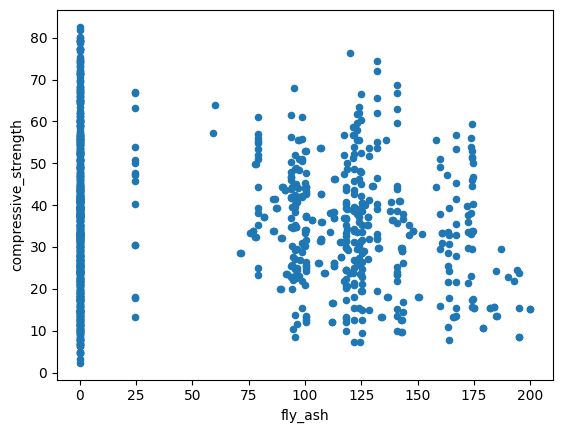

In [117]:
df.plot('fly_ash', 'compressive_strength', kind ='scatter')

<Axes: xlabel='water', ylabel='compressive_strength'>

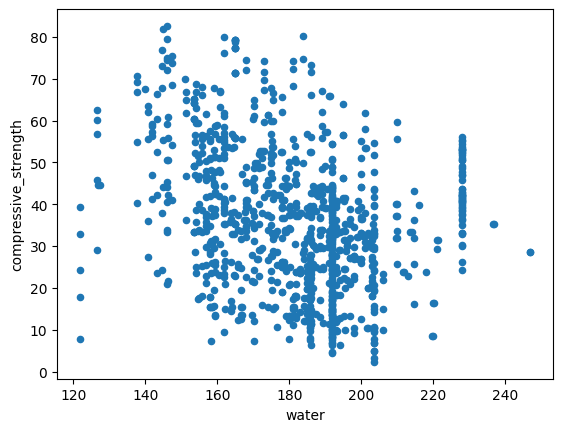

In [126]:
df.plot('water', 'compressive_strength', kind ='scatter')

In [134]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_array = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_array, columns=df.columns, index=df.index)
df_scaled.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176,0.967445
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,0.741964
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,0.472642
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.482400
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,0.522806


In [140]:
# Removing the features that affect the performacance
scaled_df_x = df_scaled[['cement', 'blast_furnace_slag', 'fly_ash', 'water']]
scaled_df_y = df_scaled['compressive_strength']


# Creating new train and test datasets with the scaled data
new_x_train, new_x_test = scaled_df_x[:950], scaled_df_x[950:]
new_y_train, new_y_test = scaled_df_y[:950], scaled_df_y[950:]

# Creating a new model using the scaled data
scaled_regression = linear_model.LinearRegression()
scaled_regression.fit(new_x_train, new_y_train)
scaled_y_predictions = scaled_regression.predict(new_x_test)

print('Coefficients: \n', scaled_regression.coef_)
print('Mean squared error: %.2f'% mean_squared_error(new_y_test, scaled_y_predictions))
print('Coefficient of determination: %.2f'% r2_score(new_y_test, scaled_y_predictions))

Coefficients: 
 [ 0.60565091  0.3700183   0.17860407 -0.25769841]
Mean squared error: 0.01
Coefficient of determination: 0.68
